In [2]:
# Read words from file
with open("brown_nouns.txt", "r") as file:
    words = [line.strip().lower() for line in file if line.strip()]


In [3]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False
        self.freq = 0  # To keep track of branching frequency

class PrefixTrie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.freq += 1
        node.is_end = True

    def collect_prefixes(self):
        """Traverse the prefix trie and collect all prefixes with their frequencies"""
        prefix_freq = {}

        def dfs(node, prefix):
            # record frequency only if more than 1 word shares this prefix
            if node.freq > 1:
                prefix_freq[prefix] = node.freq
            for ch, child in node.children.items():
                dfs(child, prefix + ch)

        for ch, child in self.root.children.items():
            dfs(child, ch)

        return prefix_freq




In [4]:
class SuffixTrie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in reversed(word):
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.freq += 1
        node.is_end = True

    def collect_suffixes(self, words):
        """Extract suffixes with frequencies using the suffix trie"""
        suffix_freq = defaultdict(int)
        for w in words:
            node = self.root
            path = ""
            for i, ch in enumerate(w[::-1]):  # reversed word
                node = node.children.get(ch)
                if not node:
                    break
                path += ch
                if len(node.children) > 1:  # branching = stem-suffix split
                    suffix = w[::-1][:i+1][::-1]  # reverse back suffix
                    suffix_freq[suffix] += 1
        return suffix_freq


In [5]:
prefix_trie = PrefixTrie()
suffix_trie = SuffixTrie()

for word in words:
    prefix_trie.insert(word)
    suffix_trie.insert(word)


In [6]:
def find_stem_suffix(word, trie, reverse=False):
    node = trie.root
    stem = ""
    max_branching = 0
    branch_point = 0

    chars = reversed(word) if reverse else word

    for i, char in enumerate(chars):
        if char in node.children:
            node = node.children[char]
            if len(node.children) > max_branching:
                max_branching = len(node.children)
                branch_point = i + 1
        else:
            break

    if reverse:
        stem = word[len(word)-branch_point:]
        suffix = word[:len(word)-branch_point]
    else:
        stem = word[:branch_point]
        suffix = word[branch_point:]
    

    
    return stem, suffix


In [11]:
# Open a file in write mode
with open("trie.txt", "w", encoding="utf-8") as f:
    for word in words:  # Just check first 20 for demo
        stem_p, suf_p = find_stem_suffix(word, prefix_trie)
        stem_s, suf_s = find_stem_suffix(word, suffix_trie, reverse=True)

        line = f"{word} -> Prefix: {stem_p}+{suf_p},  Suffix: {suf_s}+{stem_s}\n"
        f.write(line)   # write to file instead of printing

print("Results saved to trie.txt")


Results saved to trie.txt


In [12]:
def average_suffix_length(words, trie, reverse=False):
    total_len = 0
    for w in words:
        _, suffix = find_stem_suffix(w, trie, reverse)
        total_len += len(suffix)
    return total_len / len(words)

avg_pref = average_suffix_length(words, prefix_trie)
avg_suff = average_suffix_length(words, suffix_trie, reverse=True)

print(f"Avg suffix length (Prefix Trie): {avg_pref}")
print(f"Avg suffix length (Suffix Trie): {avg_suff}")


Avg suffix length (Prefix Trie): 5.153718323610775
Avg suffix length (Suffix Trie): 5.35726085219904


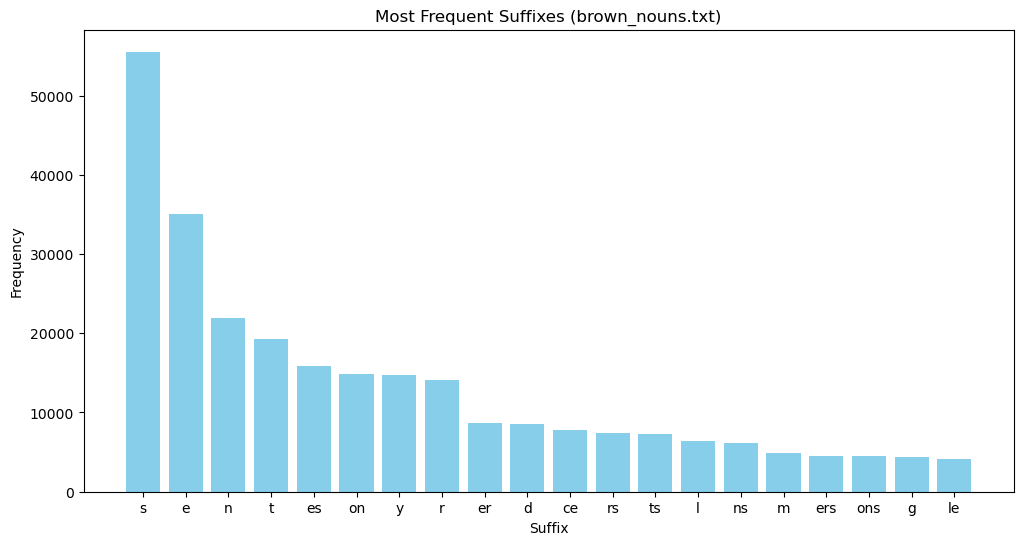

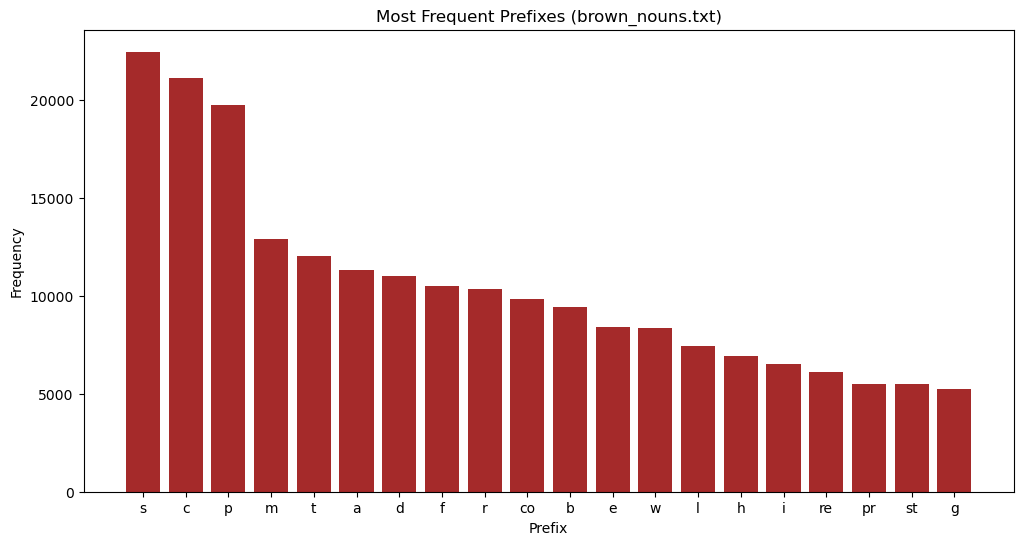

In [9]:
import matplotlib.pyplot as plt
from collections import defaultdict
   
suffix_trie = SuffixTrie()
for w in words:
    suffix_trie.insert(w[::-1])
prefix_trie = PrefixTrie()
for w in words:
    prefix_trie.insert(w)

#collect suffix freq
suffix_freq = suffix_trie.collect_suffixes(words)
prefix_freq = prefix_trie.collect_prefixes()


#top 20 
sorted_suffixes = sorted(suffix_freq.items(), key=lambda x: x[1], reverse=True)[:20]
suffixes, counts = zip(*sorted_suffixes)
sorted_prefixes = sorted(prefix_freq.items(), key=lambda x: x[1], reverse=True)[:20]
prefixes, counts1 = zip(*sorted_prefixes)

plt.figure(figsize=(12,6))
plt.bar(suffixes, counts, color="skyblue")
plt.title("Most Frequent Suffixes (brown_nouns.txt)")
plt.xlabel("Suffix")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,6))
plt.bar(prefixes, counts1, color="brown")
plt.title("Most Frequent Prefixes (brown_nouns.txt)")
plt.xlabel("Prefix")
plt.ylabel("Frequency")
plt.show()